# Neural Artistic Style Transfer

This interactive notebook shows how to use the package python package `style` for performing artistic style transfer between a 'photograph' and a style image. 

Based on the work of
```
Gatys, L. A., Ecker, A. S., & Bethge, M. (2015). 
A neural algorithm of artistic style. 
https://arxiv.org/abs/1508.06576
```

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image

Load a source image `p` and style image `a`.

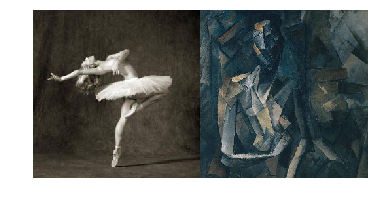

In [46]:
p = Image.open('etc/dancing.jpg').resize((256,256))
a = Image.open('etc/picasso.jpg')
a = a.resize(p.size)

plt.imshow(np.hstack((p,a)))
plt.axis('off')
plt.show()

Import `style` package and create a style transfer object

In [47]:
import style

st = style.IteratedStyleTransfer()

### Visualizing Style Transfer

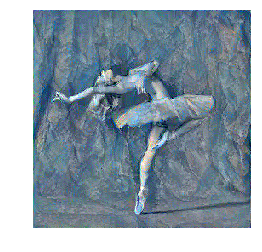

In [49]:
# choose layers for content and style loss computation
c_id = st.conv_ids[4]
s_ids = st.conv_ids[[4,8,12]]

# get a generator object
g = st.iterate(p, a, c_id, s_ids, niter=800, lr=1e-1, wc=1e-3, ws=1e4);

# and iterate (yields every 50 iterations)
fig, ax = plt.subplots()
img = ax.imshow(np.zeros((p.height, p.width, 3), dtype=np.float32))
ax.set_axis_off()

for x in g:    
    clear_output(wait=True)
    img.set_data(style.to_np_image(x))
    display(fig)
clear_output(wait=True)

## Hierarchy

100%|█████████████████████████████████████████████| 150/150 [00:01<00:00, 126.00it/s, loss=[0.005 0.002 0.007], lr=0.1]


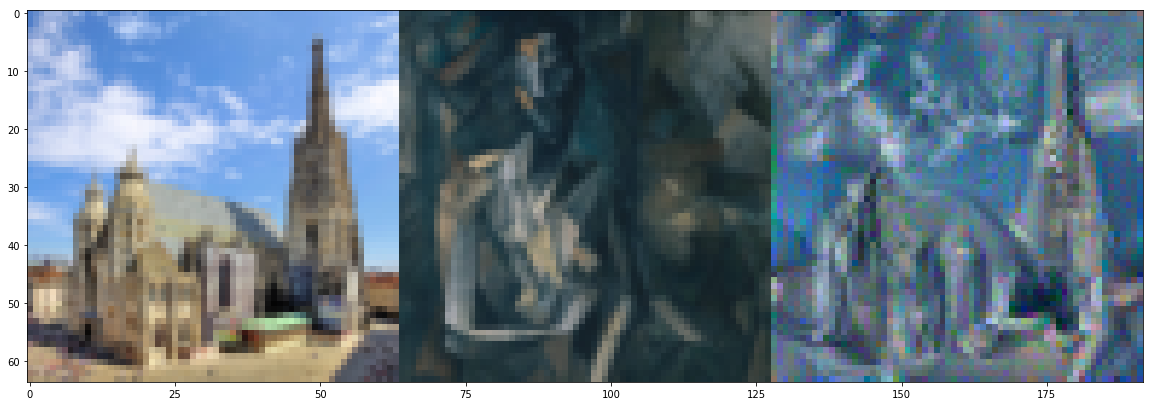

100%|██████████████████████████████████████████████| 150/150 [00:03<00:00, 42.94it/s, loss=[0.003 0.001 0.004], lr=0.1]


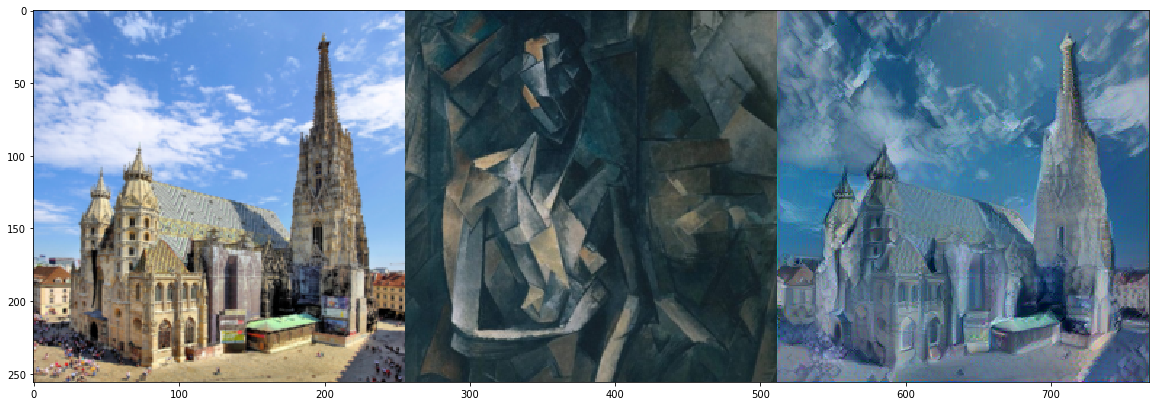

100%|██████████████████████████████████████████████| 150/150 [00:11<00:00, 13.38it/s, loss=[0.002 0.001 0.003], lr=0.1]


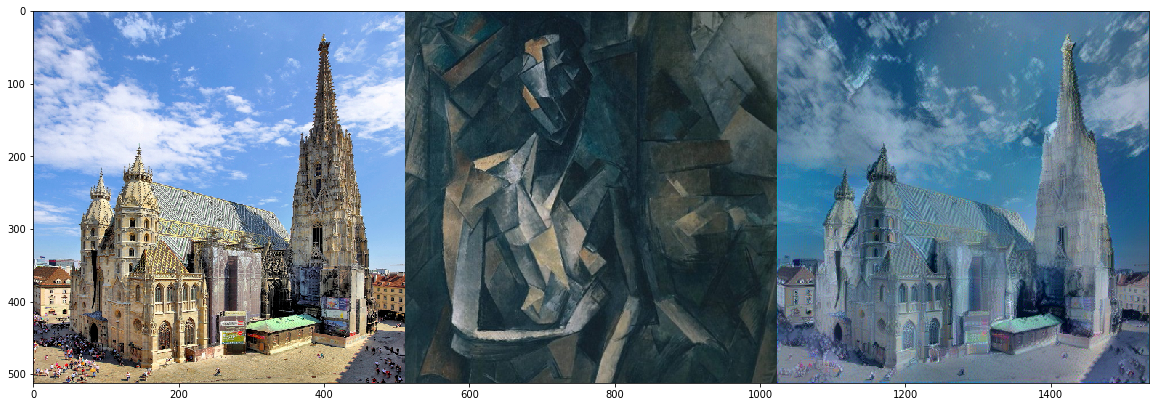

In [45]:
p = Image.open('stephansdom_small.png').resize((512,512))
a = Image.open('picasso.jpg')

scales = [64, 256, 512]
c_id = st.conv_ids[6]
s_ids = st.conv_ids[[2,3]]
x = None
for s in scales:
    pscaled = p.resize((s, s), resample=Image.BILINEAR)
    ascaled = a.resize(pscaled.size, resample=Image.BILINEAR)
    
    if x is not None:
        x = x.resize((s, s), resample=Image.BILINEAR)
    
    x = st.run(pscaled, ascaled, c_id, s_ids, niter=150, lr=1e-1, wc=1e-3, ws=1e4, x=x)
    x = style.to_pil_image(x)
    
    plt.figure(figsize=(20,8))
    plt.imshow(np.hstack((pscaled, ascaled, x)))
    plt.show()    

## Parameter Evaluation

In [ ]:
from itertools import product

content_choices = [2, 4, 8, 12]
style_choices = [[1,2,4], [4,6,8], [8,10,12]]

images = []
for c,s in product(content_choices, style_choices):
    x = run_style_transfer(vgg, dev, tnorm(p), tnorm(a), layer_ids[c], layer_ids[s], niter=2000, lr=1e-2, wc=1e-3, ws=1e4);
    images.append(tdenorm(x.squeeze().cpu()))

In [ ]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

In [ ]:
gall = gallery(np.array(images), ncols=3)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(gall)